In [25]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv("201502-citibike-tripdata.csv")

##IDEA

###There is a difference in trip durations between weekdays and weekends.

The traffic volume during the weekdays and weekends is significantly different in New York City. Several different factors vary between weekdays and weekends and influence trip duration data. There might be a significant difference between weekdays and weekends Citibike trip duration.

In [4]:
## explore data
data['date'] = pd.to_datetime(data['starttime'])
data['weekday'] = data['date'].dt.weekday
data.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date,weekday
0,801,2/1/2015 0:00,2/1/2015 0:14,521,8 Ave & W 31 St,40.750450,-73.994811,423,W 54 St & 9 Ave,40.765849,-73.986905,17131,Subscriber,1978,2,2015-02-01 00:00:00,6
1,379,2/1/2015 0:00,2/1/2015 0:07,497,E 17 St & Broadway,40.737050,-73.990093,504,1 Ave & E 15 St,40.732219,-73.981656,21289,Subscriber,1993,1,2015-02-01 00:00:00,6
2,2474,2/1/2015 0:01,2/1/2015 0:42,281,Grand Army Plaza & Central Park S,40.764397,-73.973715,127,Barrow St & Hudson St,40.731724,-74.006744,18903,Subscriber,1969,2,2015-02-01 00:01:00,6
3,818,2/1/2015 0:01,2/1/2015 0:15,2004,6 Ave & Broome St,40.724399,-74.004704,505,6 Ave & W 33 St,40.749013,-73.988484,21044,Subscriber,1985,2,2015-02-01 00:01:00,6
4,544,2/1/2015 0:01,2/1/2015 0:10,323,Lawrence St & Willoughby St,40.692362,-73.986317,83,Atlantic Ave & Fort Greene Pl,40.683826,-73.976323,19868,Subscriber,1957,1,2015-02-01 00:01:00,6


In [6]:
def wky2wkd():
    # generate weekday data    
    n = 5 
    weekday = pd.Series()
    for i in range(n):
        d = data['tripduration'][data['weekday']==i]
        weekday = weekday.append(d)
    # generate weekend data 
    m = 2
    weekend = pd.Series()
    for j in range(m):
        d = data['tripduration'][data['weekday']==j+5]
        weekend = weekend.append(d)
    # remove outlier
    weekday1 = weekday[~((weekday-weekday.mean()).abs()>3*weekday.std())]
    weekend1 = weekend[~((weekend-weekend.mean()).abs()>3*weekend.std())]
    return weekday1, weekend1

In [7]:
wky1, wkd1 = wky2wkd()

print 'Weekday Mean :%.2f' %(wky1.mean())   
print 'Weekwned Mean :%.2f' %(wkd1.mean())
print "Effect size:%.2f" %(wky1.mean() - wkd1.mean())

Weekday Mean :614.01
Weekwned Mean :617.71
Effect size:-3.69


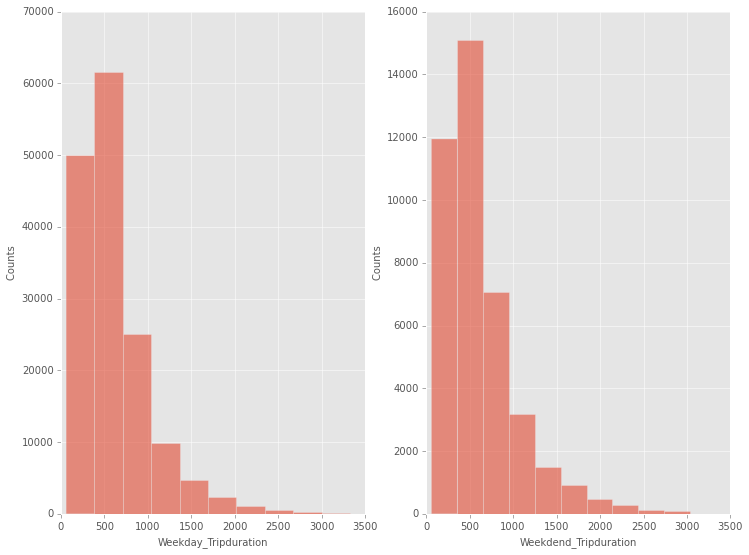

In [26]:
plt.figure(figsize=(12, 9)) 
ax1 = plt.subplot(1,2,1) 
ax1.spines["top"].set_visible(False)  
ax1.spines["right"].set_visible(False) 
ax1.get_xaxis().tick_bottom()  
ax1.get_yaxis().tick_left()  
plt.xlabel('Weekday_Tripduration',fontsize=10)
plt.ylabel('Counts ',fontsize=10)
wky1.hist(alpha=0.6)

ax2 = plt.subplot(1,2,2) 
ax2.spines["top"].set_visible(False)  
ax2.spines["right"].set_visible(False) 
ax2.get_xaxis().tick_bottom()  
ax2.get_yaxis().tick_left()  
plt.xlabel('Weekdend_Tripduration',fontsize=10)
plt.ylabel('Counts ',fontsize=10)
wkd1.hist(alpha=0.6)

##Question: Are trip durations during weekdays significantly higher than weekends?

###Testable hypothesis: 
####Null hypothesis: Mean trip durations aren't significantly different
Perform t-test and determine the p-value.


In [8]:
## t-test
stats.ttest_ind(wky1,wkd1)

(-1.6182577908340412, 0.10560866093596753)

T-test one assumption is that the data used came from a normal distribution. 
There's a Shapiro-Wilk test to test for normality. 
If p-value is less than 0.05, then there's a low chance that the distribution is normal.

In [9]:
stats.shapiro(wky1)

/Users/luke/anaconda/lib/python2.7/site-packages/scipy/stats/morestats.py:997: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.8409476280212402, 0.0)

In [10]:
stats.shapiro(wkd1)

(0.8357008099555969, 0.0)

need comment

##Brown-Mood Median Test

add detail
http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.median_test.html

In [11]:
from scipy.stats import median_test
stat, p, med, tbl = median_test(wky1,wkd1)

In [14]:
tbl

array([[78054, 19958],
       [77461, 20673]])

In [29]:
print 'P-value<0.05?: %s' %(p<0.05)

P-value<0.05?: True


add comment